In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking at Kick Return yards and how it affects points differential

In [5]:
games_df = pd.read_csv("../data/games.csv")
stats_df = pd.read_csv("../data/game_stats.csv")
games_df.head(5)

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,home_post_win_prob,away_id,away_team,away_conference,away_points,away_line_scores,away_post_win_prob,excitement_index,highlights,notes
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,0.448322,2439,UNLV,Mountain West,23.0,"[6, 7, 3, 7]",0.551678,5.598996,NaN,NaN
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,0.999811,282,Indiana State,NaN,35.0,"[7, 14, 7, 7]",0.000189,2.046742,NaN,NaN
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,0.962311,2711,Western Michigan,Mid-American,13.0,"[0, 7, 0, 6]",0.037689,4.867190,NaN,NaN
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,0.995635,2509,Purdue,Big Ten,7.0,"[0, 7, 0, 0]",0.004365,2.774517,NaN,NaN
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,0.981694,113,UMass,Mid-American,0.0,"[0, 0, 0, 0]",0.018306,1.924321,NaN,NaN


In [6]:
stats_df.head(5)

,id,home.rushingTDs,home.passingTDs,home.kickReturnYards,home.kickReturnTDs,home.kickReturns,home.kickingPoints,home.interceptionYards,home.interceptionTDs,home.passesIntercepted,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,401012867,0,1,13.0,0.0,1.0,11.0,13.0,0.0,1.0,...,3.0,6-46,2,1,1,19:05,NaN,NaN,NaN,NaN
1,401012810,4,3,14.0,0.0,1.0,7.0,32.0,0.0,3.0,...,5.8,3-25,5,2,3,22:08,15.0,0.0,1.0,8.0
2,401012884,0,1,28.0,0.0,2.0,1.0,NaN,NaN,NaN,...,3.5,9-99,2,2,0,40:58,17.0,0.0,2.0,3.0
3,401012857,3,1,19.0,0.0,1.0,4.0,1.0,0.0,1.0,...,4.8,3-40,1,0,1,26:02,10.0,0.0,3.0,9.0
4,401013332,4,3,32.0,0.0,2.0,9.0,0.0,0.0,1.0,...,3.5,8-80,1,0,1,30:58,NaN,NaN,NaN,2.0


In [8]:
main_df = combined_data = games_df.merge(stats_df, left_on="id", right_on="id", validate="one_to_one")
main_df

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away.yardsPerRushAttempt,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,5.7,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,3.4,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,0.4,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,3.0,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,3.4,8-50,2,1,1,27:00,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,401282765,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,3665.0,...,3.2,9-84,1,1,0,33:59,12.0,0.0,1.0,10.0
841,401282775,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,True,NaN,3558.0,...,4.7,7-41,1,1,0,32:37,29.0,0.0,1.0,7.0
842,401282784,2021,4,regular,2021-09-25T23:00:00.000Z,0.0,False,True,NaN,3936.0,...,3.9,7-50,2,1,1,37:14,62.0,1.0,1.0,8.0
843,401282811,2021,4,regular,2021-09-25T23:30:00.000Z,0.0,False,False,NaN,3861.0,...,1.9,4-18,2,0,2,36:24,-1.0,0.0,2.0,1.0


In [12]:
main_df.columns

[Index(['id', 'season', 'week', 'season_type', 'start_date', 'start_time_tbd',
       'neutral_site', 'conference_game', 'attendance', 'venue_id', 'venue',
       'home_id', 'home_team', 'home_conference', 'home_points',
       'home_line_scores', 'home_post_win_prob', 'away_id', 'away_team',
       'away_conference', 'away_points', 'away_line_scores',
       'away_post_win_prob', 'excitement_index', 'highlights', 'notes',
       'home.rushingTDs', 'home.passingTDs', 'home.kickReturnYards',
       'home.kickReturnTDs', 'home.kickReturns', 'home.kickingPoints',
       'home.interceptionYards', 'home.interceptionTDs',
       'home.passesIntercepted', 'home.fumblesRecovered', 'home.totalFumbles',
       'home.tacklesForLoss', 'home.defensiveTDs', 'home.tackles',
       'home.sacks', 'home.qbHurries', 'home.passesDeflected',
       'home.firstDowns', 'home.thirdDownEff', 'home.fourthDownEff',
       'home.totalYards', 'home.netPassingYards', 'home.completionAttempts',
       'home.yardsPer

In [38]:
main_df = main_df.dropna(subset=["home.kickReturnYards", "away.kickReturnYards", "home_points", "away_points"])
main_df

,id,season,week,season_type,start_date,start_time_tbd,neutral_site,conference_game,attendance,venue_id,...,away.totalPenaltiesYards,away.turnovers,away.fumblesLost,away.interceptions,away.possessionTime,home.puntReturnYards,home.puntReturnTDs,home.puntReturns,away.kickingPoints,point_diff
0,332410135,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,44217.0,3953.0,...,1-15,2,0,2,31:56,15.0,0.0,1.0,5.0,28.0
1,332410084,2013,1,regular,2013-08-29T23:00:00.000Z,NaN,False,False,40278.0,3830.0,...,7-83,2,1,1,27:42,90.0,1.0,4.0,5.0,38.0
2,332420127,2013,1,regular,2013-08-31T00:00:00.000Z,NaN,False,False,71214.0,3936.0,...,7-65,4,1,3,26:36,52.0,0.0,5.0,1.0,13.0
3,332432132,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,36007.0,3854.0,...,7-40,4,2,2,26:12,-2.0,0.0,4.0,1.0,35.0
4,332430275,2013,1,regular,2013-08-31T16:00:00.000Z,NaN,False,False,76306.0,347.0,...,8-50,2,1,1,27:00,0.0,0.0,2.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,401282707,2021,4,regular,2021-09-25T16:00:00.000Z,0.0,True,False,NaN,3933.0,...,11-93,1,1,0,31:46,16.0,0.0,3.0,11.0,-28.0
839,401282756,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,3793.0,...,8-54,1,1,0,28:57,66.0,0.0,4.0,2.0,10.0
840,401282765,2021,4,regular,2021-09-25T19:30:00.000Z,0.0,False,False,NaN,3665.0,...,9-84,1,1,0,33:59,12.0,0.0,1.0,10.0,21.0
842,401282784,2021,4,regular,2021-09-25T23:00:00.000Z,0.0,False,True,NaN,3936.0,...,7-50,2,1,1,37:14,62.0,1.0,1.0,8.0,3.0


In [39]:
def point_diff(row):
    return row["home_points"] - row["away_points"]
main_df["point_diff"] = main_df.apply(point_diff, axis=1)
main_df["point_diff"]

/var/folders/f4/tpdb6nvn0rx2cmxl3vftw5hw0000gn/T/ipykernel_86964/376821686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df["point_diff"] = main_df.apply(point_diff, axis=1)


0      28.0
1      38.0
2      13.0
3      35.0
4      45.0
       ... 
835   -28.0
839    10.0
840    21.0
842     3.0
844    -2.0
Name: point_diff, Length: 691, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Point Differential'),
 Text(0.5, 0, 'Kick Return Yards'),
 Text(0.5, 1.0, 'Home Teams')]

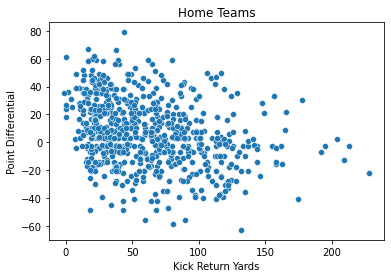

In [46]:
fig1 = sns.scatterplot(main_df["home.kickReturnYards"], main_df["point_diff"])
fig1.set(xlabel='Kick Return Yards', ylabel='Point Differential', title="Home Teams")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Point Differential'),
 Text(0.5, 0, 'Kick Return Yards'),
 Text(0.5, 1.0, 'Away Teams')]

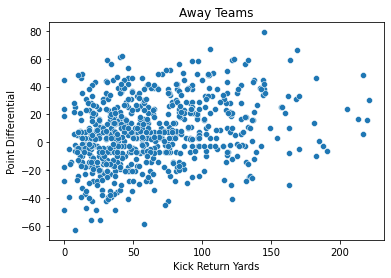

In [47]:
fig1 = sns.scatterplot(main_df["away.kickReturnYards"], main_df["point_diff"])
fig1.set(xlabel='Kick Return Yards', ylabel='Point Differential', title="Away Teams")


Clearly not a very  good indicator